# DATA SCIENCE PROJECT BY GROUP 12
### Sofia Padovani Plazzi - ID: sofpad-3
### Devashish Singha Roy - ID: devsin-3

This project aims to develop a machine-learning model to categorize apple quality based on different features accurately. The hypothesis is that it is possible to build a consistent system that automatically and efficiently classifies apple quality by using a dataset with information on apples' attributes and different machine-learning techniques.

### Contents
- Preprocessing
- Data Visualization
- Standardization
- Classification Models + Cross Validation
- Grid Search

#### Load the libraries

These are the essential libraries used throughout this project. 
A random seed ensures that we compare different approaches as the results of same approaches remain the same.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RANDOM_SEED = 12345

In [56]:
# Class for all the file operations
class DataOperation():
    def __init__(self, file_name):
        self._file_name = file_name
        self._df = pd.DataFrame
    
    # Function to read file
    def open_file(self):
        try:
            self._df = pd.read_csv(self._file_name)
            return self._df
        except NameError:
            print("File not found")

    # Function to preprocess and prepare the data
    def prepare_data(self, drop_null= None, scale=None, features=None):
        # Dropping all null values, if it exists
        if drop_null == 'y':
            if self._df.isnull().sum().sum() > 0:
                self._df = self._df.dropna()
                print(f'Null values after removing  {self._df.isnull().sum().sum()}')
            else:
                print('No null values found')

        if scale == 'y':
            scaler = StandardScaler().fit(features)
            features = scaler.transform(features)

        return (self._df, features)
        
    # Generic function to visualise the data by printing
    def explore_data(self):
        if self._df is not None:
            #To visualize top rows of data 
            print("\nTop rows of data\n")
            print(self._df.head())

            #To visualize data information
            print("\nData Information\n")
            print(self._df.info())

            #To visualize data description
            print("\nData description\n")
            print(self._df.describe())

            #To visualize if data has any null values
            print("\nNull values\n")
            print(self._df.isnull().sum())

        else:
            print("No dataset provided")


In [57]:
# Class for all the plot visualisations
class PlotVisualisation():
    def __init__(self, df=None):
        self._df = df
    
    # Function to plot label imbalance
    def plot_label_imbalance(self,labels):
        # Plot count of different categoring in the class variable.. This is to see the imbalance in the class.. 
        sns.countplot(x = labels)
        plt.show()

    # Function to plot feature correlation
    def plot_feature_correlation(self,features):        
        sns.heatmap(features.corr(),annot = True, cmap = 'coolwarm', fmt = '.2f')
        plt.title('Feature correlation matrix')
        plt.show()


    def comparison_of_features_to_label(self, label_col_name, label_val1, label_val2 ):
        
        # Divide the dataset by label, so to compare features by label.
        ds1 = self._df[self._df[label_col_name]==label_val1]
        ds2 = self._df[self._df[label_col_name]==label_val2]

        # get just features
        features = [feature for feature in ds1.columns if feature != label_col_name]
        
        for feature in features:
            fig, axs = plt.subplots(1,2)
            # Set a title for the entire figure
            fig.suptitle(f'Comparison of {feature} by {label_col_name}')
        
            axs[0].hist(ds1[feature],edgecolor='black',color='blue')            
            axs[0].set_title(f'{label_val1} {label_col_name}')
            axs[0].set_xlabel(feature)
            axs[0].set_ylabel('Apple Count')
            axs[0].set_xticks(np.arange(-6,8, step=2))
            axs[0].set_xticklabels(np.arange(-6,8,step=2), rotation = 45)
        
            axs[1].set_title(f'{label_val2} {label_col_name}')
            axs[1].set_xlabel(feature)
            axs[1].set_ylabel('Apple Count')
            axs[1].hist(ds2[feature],edgecolor='black',color='yellow')
            axs[1].set_xticks(np.arange(-6,8,step=2))
            axs[1].set_xticklabels(np.arange(-6,8,step=2), rotation = 45)
            
            # adjust layout so that they dont over lap
            plt.tight_layout()
            plt.show()
        

In [58]:
# Test DataOperation class
do = DataOperation('apple.csv')
df = do.open_file()
do.explore_data()
df,_ = do.prepare_data(drop_null='y')
df = df.drop(columns = 'A_id')


Top rows of data

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  

Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null  

In [59]:
# Split the data in fetures and lables
X = df.drop(columns = 'Quality')
y = df['Quality']

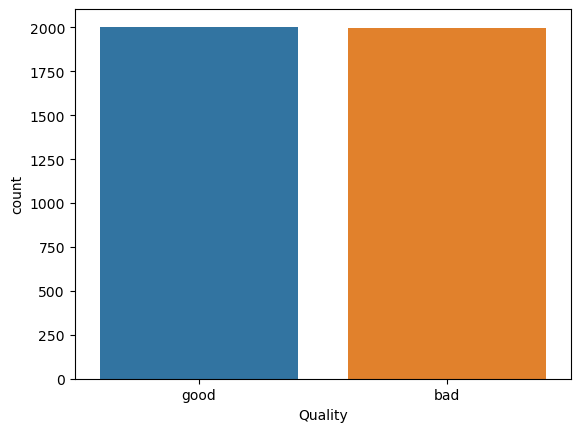

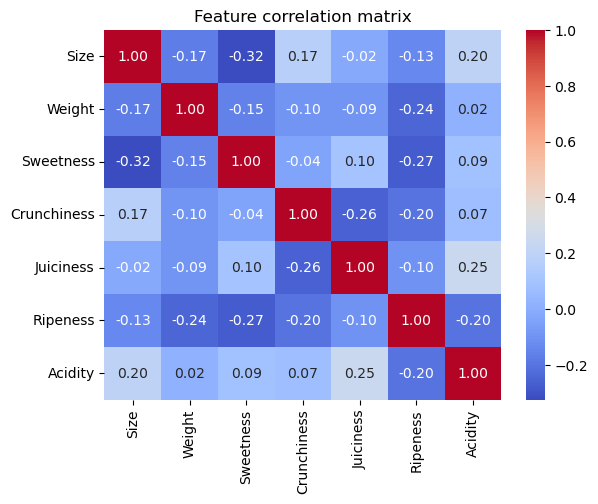

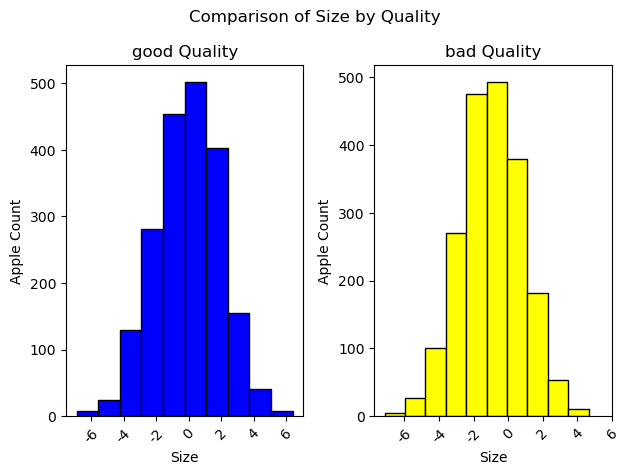

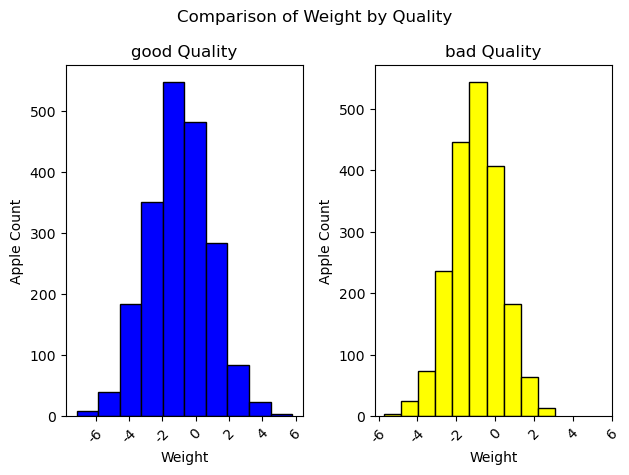

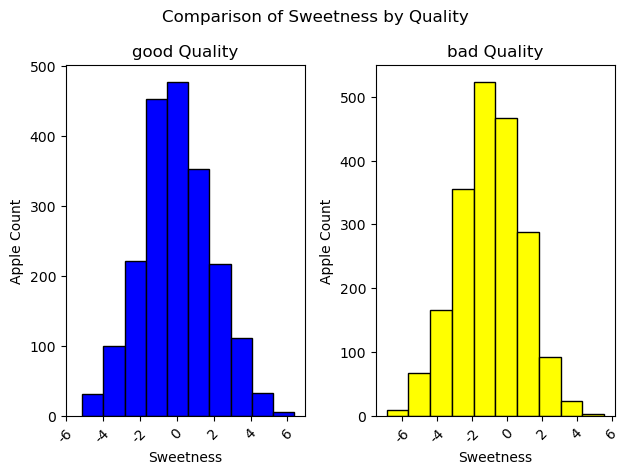

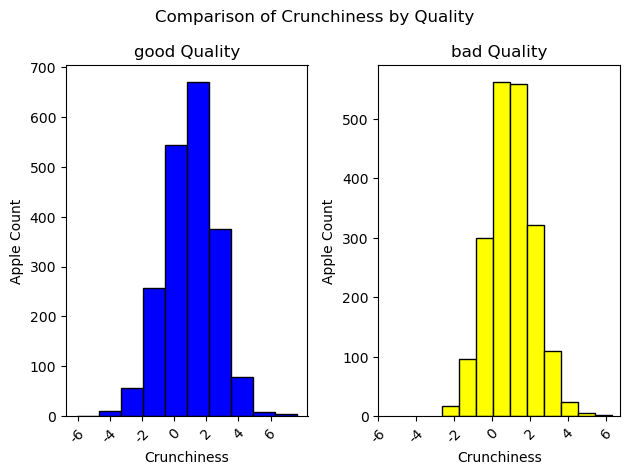

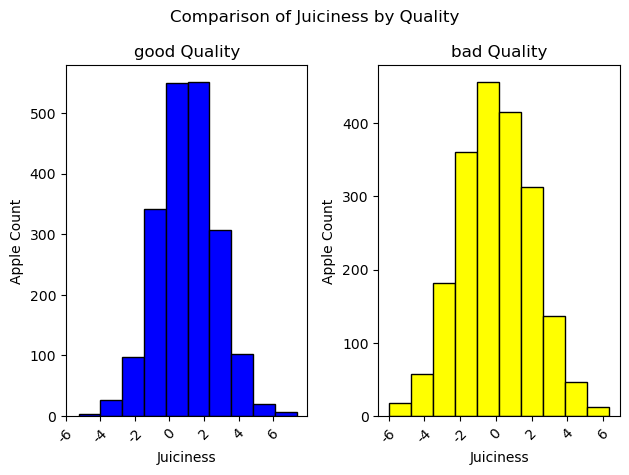

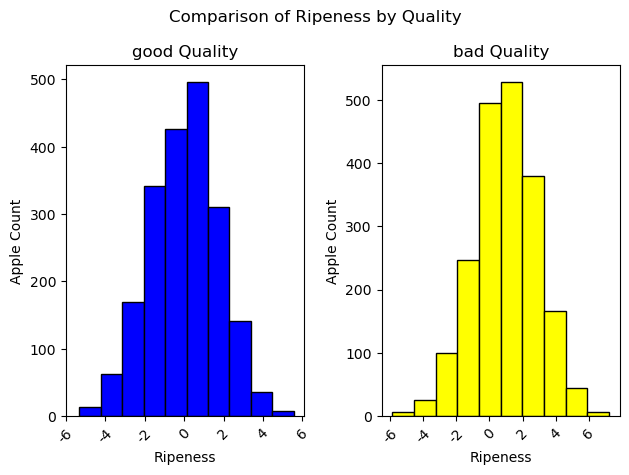

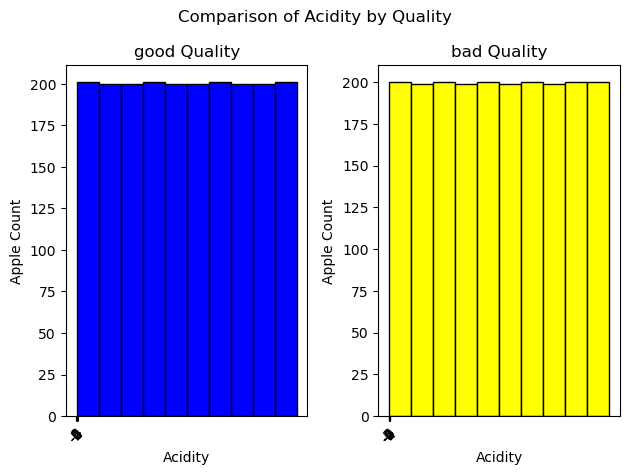

In [60]:
# visualise data plots (tetsing of PlotVisualisation class)
pv = PlotVisualisation(df)
pv.plot_label_imbalance(y)
pv.plot_feature_correlation(X)
pv.comparison_of_features_to_label(label_col_name='Quality', label_val1='good', label_val2='bad')

In [61]:
# Class to handle model proccessing. This class inherits from parent class DataOperation, PlotVisualisation
class ModelProcessing(DataOperation, PlotVisualisation):
    def __init__(self,file_name):
        DataOperation.__init__(self,file_name)
        PlotVisualisation.__init__(self, self._df) 
        
    # Function to get the data
    def get_df(self):
        return (self._df)


    # Function to train and test model
    def modelling(self, X, y, model):
        
        # Scale the data
        _ , X = super().prepare_data(scale='y', features=X)

        # split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

        # fit the data to model
        model.fit(X_train,y_train)

        # test the model
        y_pred = model.predict(X_test)

        # Metrics
        # accuracy = (TP + TN) /  (TP + TN + FP + FN)
        accuracy = model.score(X_test, y_test) # deafault score is accuracy
        
        # precision = TP  /  (TP + FP )
        precision = precision_score(y_pred,y_test, pos_label='good') # pos_label specifies the label that should be considered positive class
        
        # recall = TP  /  (TP + FN )
        recall = recall_score(y_pred,y_test, pos_label='good')
        
        # f1 = 2 * (precision * recall) / (precision + recall)
        f1 = f1_score(y_pred,y_test, average='weighted') # average='weighted' - Weighted averaging takes the weighted average of F1 scores for each class, weighted by the number of true instances for each class. It's useful when classes are imbalanced.
        
        # cross validation 
        cv_scores = cross_val_score(model, X, y, cv=5) 
        
        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test,y_pred) # Passing actual labels and predicted labels
        matrix_viz = ConfusionMatrixDisplay(conf_matrix, display_labels = ["Good","Bad"])
        matrix_viz.plot(colorbar=False,cmap='Blues')
        plt.show()

        # return accuracy, precision, recall, f1 score, cross validation scores
        return (accuracy, precision, recall, f1, cv_scores)

    
    # Function to do grid search to get the best model and best hyperparameters
    def grid_search(self, X, y, model,grid):
        
        # Scale the data
        _ , X = super().prepare_data(scale='y', features=X)

        # split the data using a proportion of 70-30
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

        # Define the gridsearch algorithm
        grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='accuracy')
        
        # fit the data to grid serach alorithm
        grid_search.fit(X_train,y_train)

        # best model and best parameters
        best_model = grid_search.best_estimator_
        best_parameters = grid_search.best_params_
                
        # return the best model and best parameters
        return (best_model, best_parameters)


Top rows of data

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  

Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null  

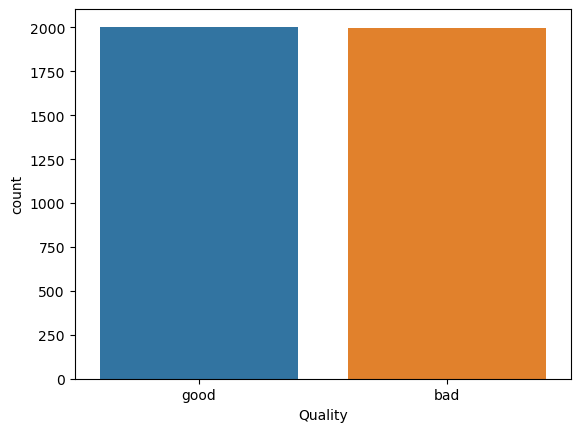

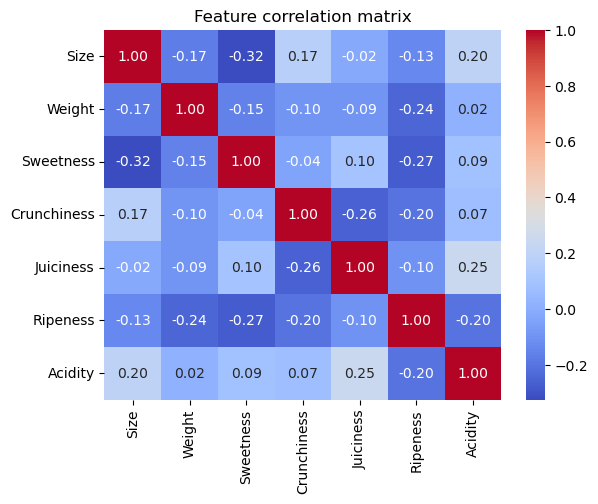

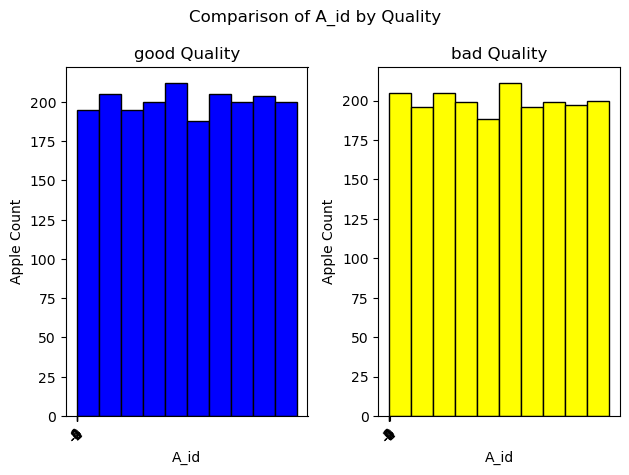

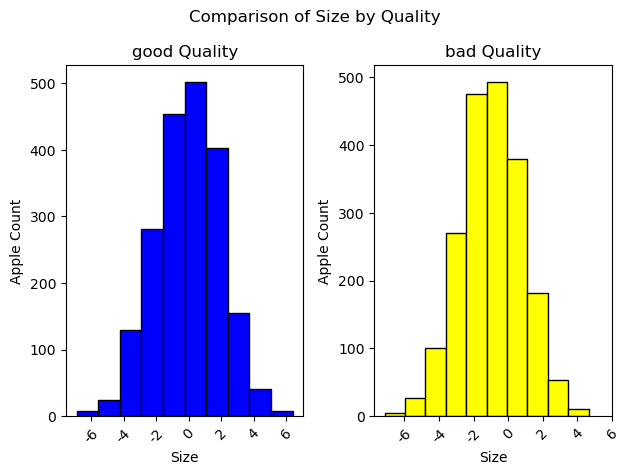

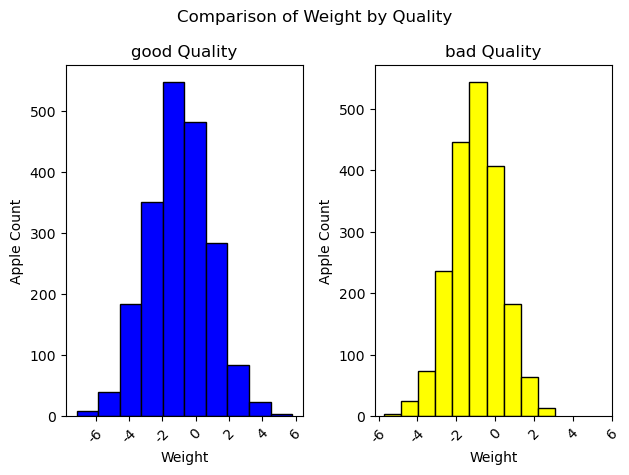

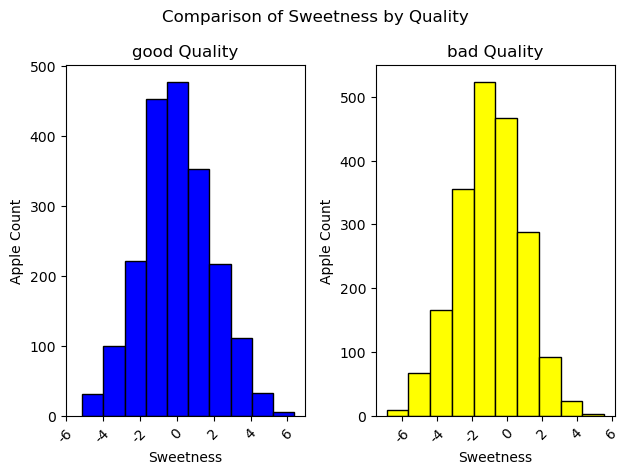

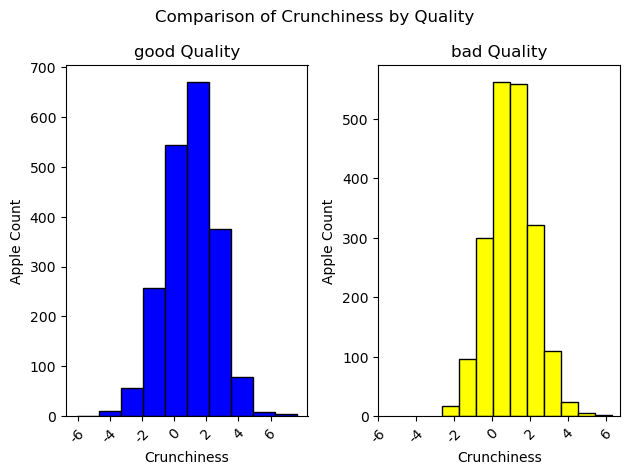

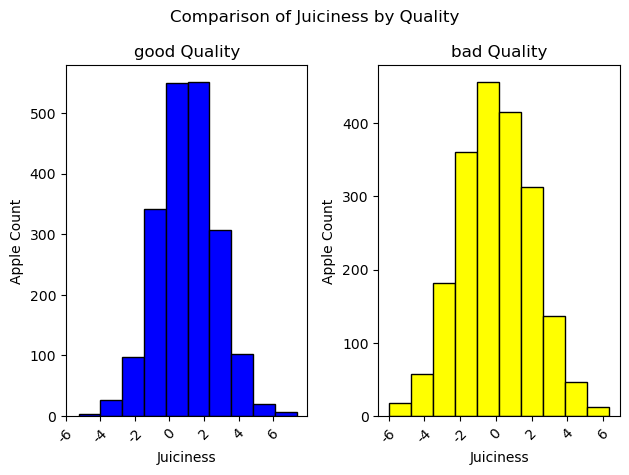

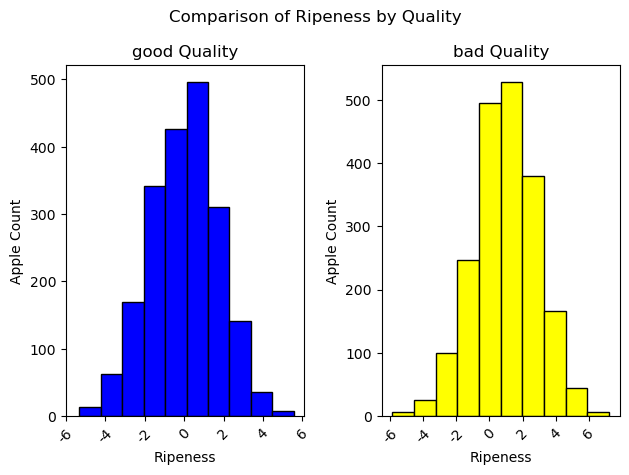

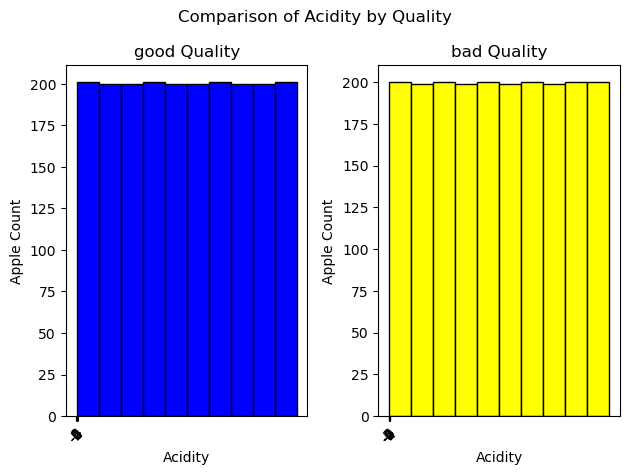

In [62]:
# Define an instance of ModelProcessing class
mp = ModelProcessing('apple.csv')

# read the file and get it in dataframe
df = mp.open_file()

# Explore the data
mp.explore_data()

# prepare the data by dropping null values and unnecessary columne
df,_ = mp.prepare_data(drop_null = 'y')
df = df.drop(columns = 'A_id')


# Split the data in fetures and lables
X = df.drop(columns = 'Quality')
y = df['Quality']

# Visualise the data using plots
mp.plot_label_imbalance(y)
mp.plot_feature_correlation(X)
mp.comparison_of_features_to_label(label_col_name='Quality', label_val1='good', label_val2='bad')

### Perceptron


Results from perceptron



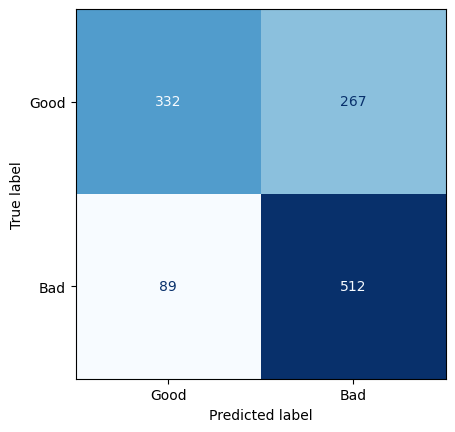



Accuracy score                  : 70.33333333333334%
Precision score                 : 85.19134775374376%
Recall score                    : 65.72528883183568%
F1 score                        : 71.00861040068199%
Accuracy using Cross Validation : 67.07499999999999%


In [63]:
# Define and run the best model
model = Perceptron(max_iter=100, tol=True, shuffle = True)
print(f'\nResults from perceptron\n')
accuracy, precision, recall, f1, cv_scores = mp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')

### K-nearest neighbors


Results from KNeighborsClassifier



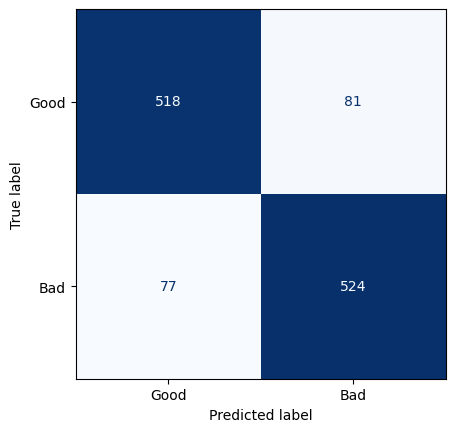



Accuracy score                  : 86.83333333333333%
Precision score                 : 87.18801996672212%
Recall score                    : 86.61157024793388%
F1 score                        : 86.83355278326401%
Accuracy using Cross Validation : 89.15%


In [64]:
# Define and run the best model
model = KNeighborsClassifier(n_neighbors=3)
print(f'\nResults from KNeighborsClassifier\n')
accuracy, precision, recall, f1, cv_scores = mp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')

### K-nearest neighbors with grid search


Results from KNeighborsClassifier with grid search

Best model from grid search     :KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')


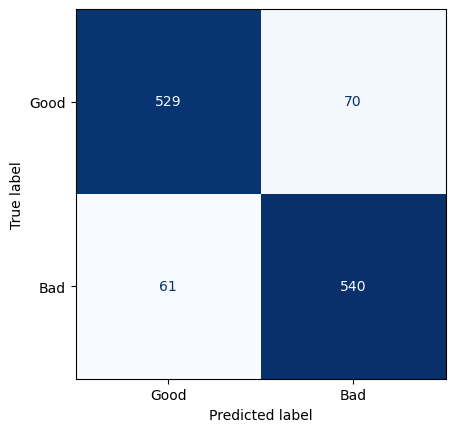



Accuracy score                  : 89.08333333333334%
Precision score                 : 89.85024958402661%
Recall score                    : 88.52459016393442%
F1 score                        : 89.08408391723654%
Accuracy using Cross Validation : 89.825%


In [65]:
# Set the parameter grid for grid search algorithm to go through and find the best parameters and model
param_grid = {
    'n_neighbors': [3, 5, 7, 9],          # Number of neighbors
    'weights': ['uniform', 'distance'],   # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Get the best model from grid search
model, params = mp.grid_search(X,y,model,param_grid)

print(f'\nResults from KNeighborsClassifier with grid search\n')
print(f'Best model from grid search     :{model}')

# Run the best model
accuracy, precision, recall, f1, cv_scores = hp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')

### Decision tree


Results from DecisionTreeClassifier



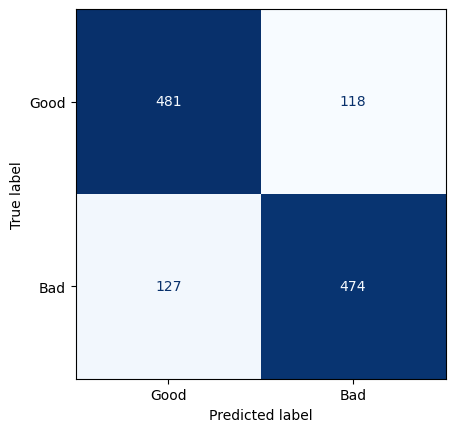



Accuracy score                  : 79.58333333333333%
Precision score                 : 78.86855241264558%
Recall score                    : 80.06756756756756%
F1 score                        : 79.58422659289563%
Accuracy using Cross Validation : 80.95000000000002%


In [66]:
# Define and run the best model
model = DecisionTreeClassifier(random_state = RANDOM_SEED)
print(f'\nResults from DecisionTreeClassifier\n')
accuracy, precision, recall, f1, cv_scores = mp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')

### Support vector machines


Results from Support vector classifier



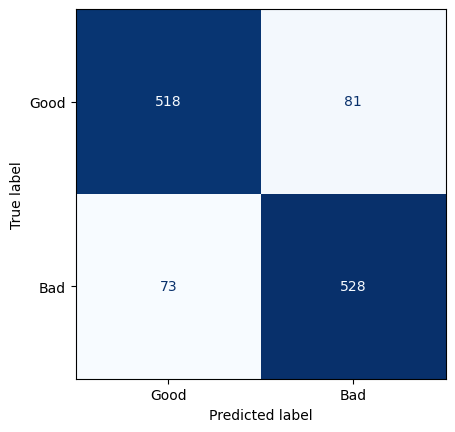



Accuracy score                  : 87.16666666666667%
Precision score                 : 87.85357737104825%
Recall score                    : 86.69950738916256%
F1 score                        : 87.16737967914439%
Accuracy using Cross Validation : 89.14999999999999%


In [67]:
# Define and run the best model
model = SVC()
print(f'\nResults from Support vector classifier\n')
accuracy, precision, recall, f1, cv_scores = mp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')

### Support vector machines with grid search


Results from Suport vector Classifier with grid search

Best model from grid search     :SVC(C=10)


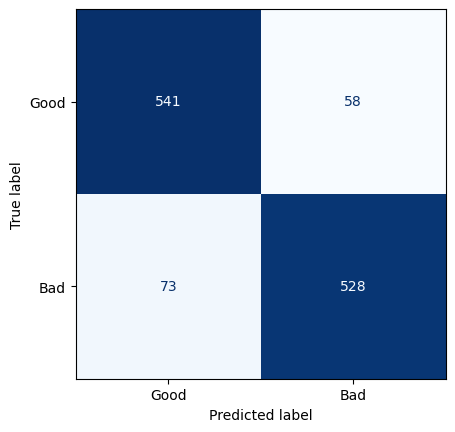



Accuracy score                  : 89.08333333333334%
Precision score                 : 87.85357737104825%
Recall score                    : 90.10238907849829%
F1 score                        : 89.08481180545958%
Accuracy using Cross Validation : 90.67500000000001%


In [68]:
# Set the parameter grid for grid search algorithm to go through and find the best parameters and model
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter: smaller C -> more misclassifications but maybe bettere generalization
    'kernel': ['linear', 'rbf'],   # Kernel type: linear dot product of feature vs similarity between sample in higher-dim space
    'gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf' kernel: (influence of one training sample) 1/n_features/X_var vs 1/n_features
}

# Get the best model from grid search
model, params = hp.grid_search(X,y,model,param_grid)

print(f'\nResults from Suport vector Classifier with grid search\n')
print(f'Best model from grid search     :{model}')

# Run the best model
accuracy, precision, recall, f1, cv_scores = mp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')

### RANDOM FOREST


Results from RandomForestClassifier



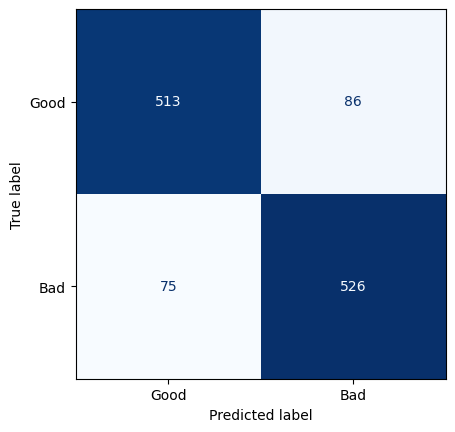



Accuracy score                  : 86.58333333333333%
Precision score                 : 87.52079866888519%
Recall score                    : 85.94771241830065%
F1 score                        : 86.58466583925474%
Accuracy using Cross Validation : 88.325%


In [69]:
# Define and run the best model
model = RandomForestClassifier(random_state=RANDOM_SEED)
print(f'\nResults from RandomForestClassifier\n')
accuracy, precision, recall, f1, cv_scores = mp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')

### RANDOM FOREST with grid search


Results from RandomForestClassifier with grid search

Best model from grid search     :RandomForestClassifier(n_estimators=200, random_state=12345)


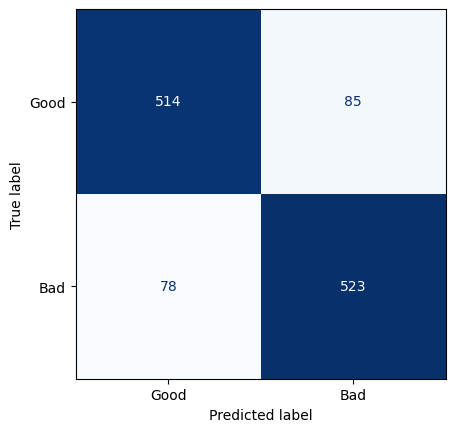



Accuracy score                  : 86.41666666666666%
Precision score                 : 87.0216306156406%
Recall score                    : 86.01973684210526%
F1 score                        : 86.4172609709296%
Accuracy using Cross Validation : 88.6%


In [53]:
# Set the parameter grid for grid search algorithm to go through and find the best parameters and model
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest: more trees -> better performance (till a certain point)
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees: deeper tree -> better for non-linearity (but maybe overfitting)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node (avoid overfitting)
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node (avoid overfitting)
}

# Get the best model from grid search
model, params = hp.grid_search(X,y,model,param_grid)

print(f'\nResults from RandomForestClassifier with grid search\n')
print(f'Best model from grid search     :{model}')

# Run the best model
accuracy, precision, recall, f1, cv_scores =mp.modelling(X,y,model)

# Print results
print('\n')
print(f'Accuracy score                  : {accuracy*100}%')
print(f'Precision score                 : {precision*100}%')
print(f'Recall score                    : {recall*100}%')
print(f'F1 score                        : {f1*100}%')
print(f'Accuracy using Cross Validation : {np.mean(cv_scores)*100}%')